In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = "Model/Dataset"
data_test_path = "Model/test"
data_val_path = "Model/validation"

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size =(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 204 files belonging to 3 classes.


In [5]:
data_cat =data_train.class_names

In [6]:
data_cat

['Fire', 'Flood', 'earthquake']

In [7]:
data_val= tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size =(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 24 files belonging to 3 classes.


In [8]:
data_test= tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size =(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 27 files belonging to 3 classes.


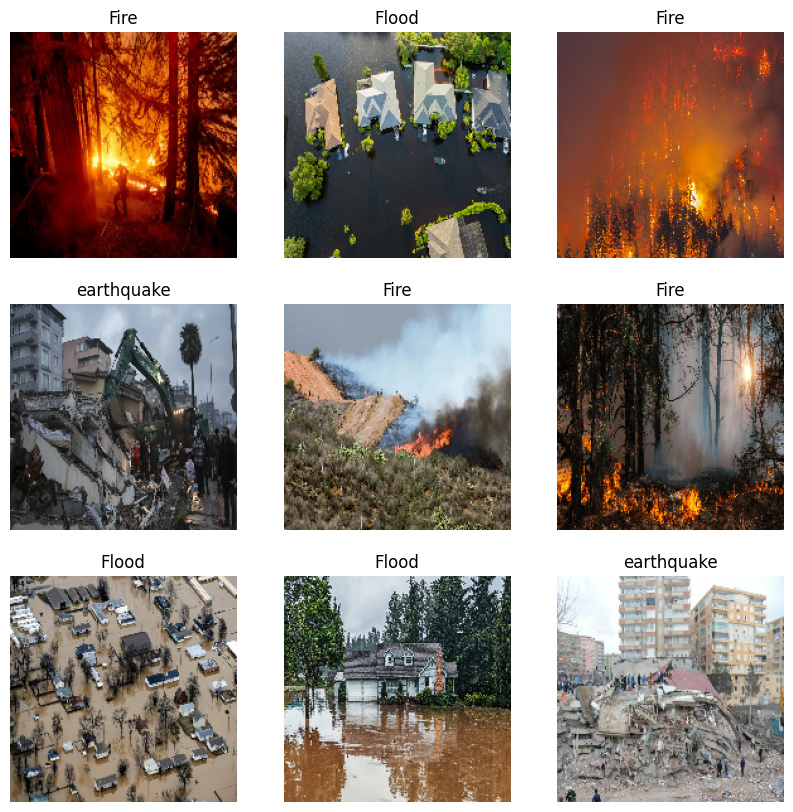

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [13]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [14]:
epochs_size =25
history = model.fit(data_train,validation_data=data_val , epochs=epochs_size)

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 488ms/step - accuracy: 0.3903 - loss: 3.8788 - val_accuracy: 0.2083 - val_loss: 2.1538
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.5746 - loss: 1.0773 - val_accuracy: 0.2917 - val_loss: 2.2328
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - accuracy: 0.5484 - loss: 0.7901 - val_accuracy: 0.2917 - val_loss: 2.8174
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.6872 - loss: 0.6246 - val_accuracy: 0.0417 - val_loss: 3.3441
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.8206 - loss: 0.5176 - val_accuracy: 0.1667 - val_loss: 4.5306
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - accuracy: 0.7863 - loss: 0.4541 - val_accuracy: 0.0000e+00 - val_loss: 4.2304
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 414ms/step - accuracy: 0.9037 - loss: 0.3557 - val_accuracy: 0.0417 - val_loss: 4.8232
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 461ms/step - accuracy: 0.8887 - loss: 0.3637 - val_accuracy: 0.0833 - val_l

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ rescaling (Rescaling)     │ (None, 180, 180, 3) │          0 │
├───────────────────────────┼─────────────────────┼────────────┤
│ conv2d (Conv2D)           │ (None, 180, 180,    │        448 │
│                           │ 16)                 │            │
├───────────────────────────┼─────────────────────┼────────────┤
│ max_pooling2d             │ (None, 90, 90, 16)  │          0 │
│ (MaxPooling2D)            │                     │            │
├───────────────────────────┼─────────────────────┼────────────┤
│ conv2d_1 (Conv2D)         │ (None, 90, 90, 32)  │      4,640 │
├───────────────────────────┼─────────────────────┼────────────┤
│ max_pooling2d_1           │ (None, 45, 45, 32)  │          0 │
│ (MaxPooling2D)            │                     │            │
├───────────────────────────┼─────────────────────┼────────────┤
│ conv2d_2 (Conv2D)         │ (None, 45, 45, 64)  │     18,496 │
├───────────────────────────┼─────────────────────┼────────────┤
│ max_pooling2d_2           │ (None, 22, 22, 64)  │          0 │
│ (MaxPooling2D)            │                     │            │
├───────────────────────────┼─────────────────────┼────────────┤
│ flatten (Flatten)         │ (None, 30976)       │          0 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dropout (Dropout)         │ (None, 30976)       │          0 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense (Dense)             │ (None, 128)         │  3,965,056 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense_1 (Dense)           │ (None, 3)           │        387 │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 11,967,083 (45.65 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,056 (30.43 MB)

Text(0.5, 1.0, 'Loss')

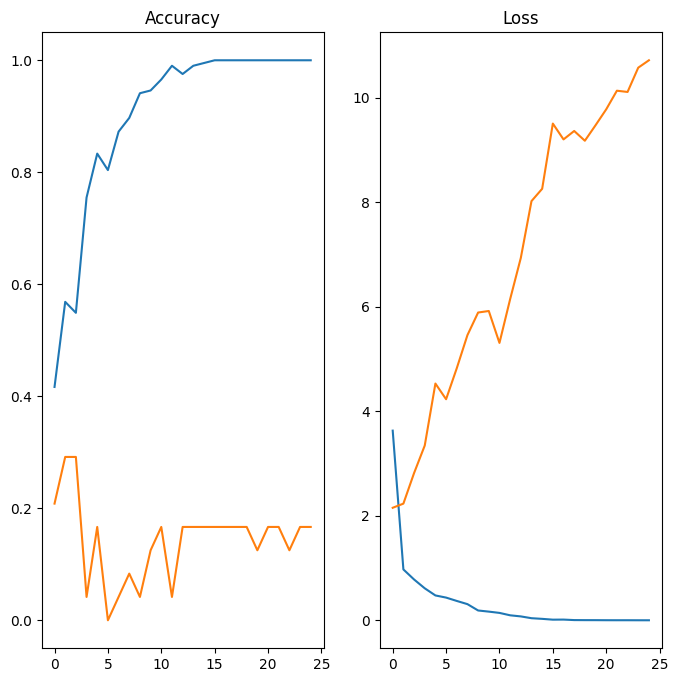

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history["accuracy"],label="Training Accurancy")
plt.plot(epochs_range,history.history["val_accuracy"],label="Validation Accurency")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history["loss"],label="Training loss")
plt.plot(epochs_range,history.history["val_loss"],label="Validation loss")
plt.title("Loss")
         

In [17]:
image ="Model/fire.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [18]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [19]:
score = tf.nn.softmax(predict)

In [20]:
print("Naturel disaster in image is {} with accurancy of {:0.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))

Naturel disaster in image is Fire with accurancy of 100.00


In [21]:
model.save("Image_classify.keras")